In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory



# Any results you write to the current directory are saved as output.

In [3]:
#creating a dataframe in pandas
df=pd.read_csv('winequality-red.csv')

In [4]:
#printing the first 5 rows of the dataframe
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
#computing summary statistics for each column of the dataframe
df.describe()

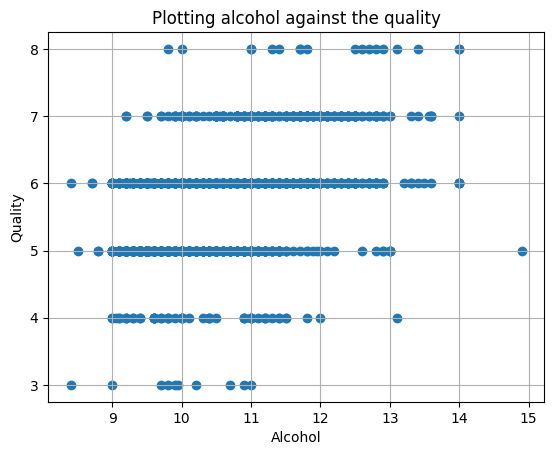

In [5]:
#Let's plot a scatter plot of alcohol against its quality
import matplotlib.pyplot as plt
plt.scatter(df['alcohol'],df['quality'])
plt.xlabel('Alcohol')
plt.ylabel('Quality')
plt.title('Plotting alcohol against the quality')
plt.grid(True)
plt.show()

*There is a weak positive relationship betweeen wine quality and alcohol content. Wines with high alcohol content are mostly high in quality*

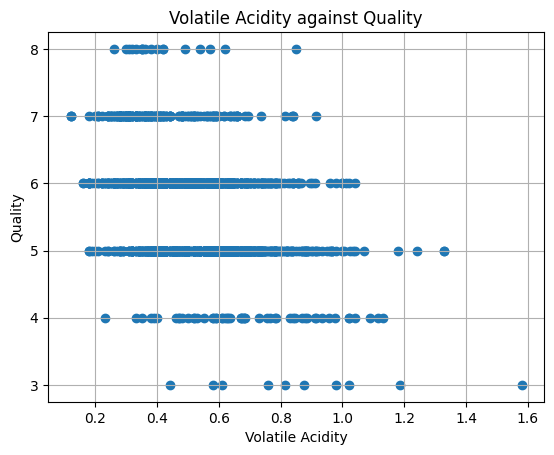

: 

In [6]:
#Plotting volatile acidity against quality
import matplotlib.pyplot as plt
plt.scatter(df['volatile acidity'],df['quality'])
plt.xlabel('Volatile Acidity')
plt.ylabel('Quality')
plt.title('Volatile Acidity against Quality')
plt.grid(True)
plt.show()

*There is a negative relationship between volatile acidity and quality*

Our quality is the response variable and we need to find the features due to which the response variable gets affected<br>
For eg we see a positive relationship between quality and alcohol but a negative relationship between volatile acidity and quality <br>
So to determine that we have to print the coefficient matrix

In [ ]:
df.corr()
#This gives the pairwise correlation matrix

*We see that quality has positive relation with many features but the quality has the strongest correlation with alcohol among all.*

**Fitting and evaluating the model**

In [ ]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
#from sklearn.linear_model import LinearRegression
#from sklearn.cross_validation import train_test_split

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
df=pd.read_csv('../input/winequality-red.csv')

In [ ]:
X = df[list(df.columns)[:-1]]

In [ ]:
y=df['quality']

In [ ]:
#divide the data into training and testing set 
X_train, X_test,y_train,y_test=train_test_split(X,y)

In [ ]:
#Creating the linear regression model and fitting the data to it
regressor=LinearRegression()
regressor.fit(X_train,y_train)
y_prediction=regressor.predict(X_test)

In [ ]:
#Printing the r score value
print('R-score is %s'%regressor.score(X_test,y_test))

*Using cross validation method*

In [ ]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
df=pd.read_csv('../input/winequality-red.csv')
X = df[list(df.columns)[:-1]]
y=df['quality']

In [ ]:
regressor=LinearRegression()
#Computing score using 5 fold cross validation method. cv is used to determine the folds ie 5
scores=cross_val_score(regressor,X,y,cv=5)

In [ ]:
print(scores.mean())

In [ ]:
print(scores)

**Stochastic Gradient Descent(SGD)**


SGD is used to optimize cost function such as Residual Sum of squares. It uses only one training instance at a particular time unlike Batch Gradient Descent

In [ ]:
import numpy as np
from sklearn.datasets import load_boston
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
#Loading the boston housing dataset
data=load_boston()

In [ ]:
#Splitting the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(data.data,
data.target)

In [ ]:
X_scaler = StandardScaler()
y_scaler = StandardScaler()
X_train = X_scaler.fit_transform(X_train)
#y_train = y_scaler.fit_transform(y_train)
X_test = X_scaler.transform(X_test)
#y_test = y_scaler.transform(y_test)

In [ ]:
from sklearn.preprocessing import scale

In [ ]:
import numpy as np
y_train = np.array(y_train).reshape(-1,1)
y_test = np.array(y_test).reshape(-1,1)

In [ ]:
y_train = y_scaler.fit_transform(y_train)

In [ ]:
y_test=y_scaler.fit_transform(y_test)

In [ ]:
regressor = SGDRegressor(loss='squared_loss')

In [ ]:
scores = cross_val_score(regressor, X_train, y_train, cv=5)

In [ ]:
print('Cross validation r-squared scores:%s' %scores)
print('Average cross validation r-squared score:%s'%np.mean(scores))

In [ ]:
y_test=y_test.flatten()

In [ ]:
y_train=y_train.flatten()

In [ ]:
regressor.fit(X_train, y_train)
print('Test set r-squared score:%s' %regressor.score(X_test, y_test))